# J.A.R.V.I.S -- Data Preprocessing, Model training and evaluation

In [41]:
import os
import sys

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import xgboost as xgb

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [43]:
dataset=pd.read_csv("data.csv")
dataset.head()
dataset.info()
# dataset.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chroma_stft                  19765 non-null  float64
 1   chroma_cqt                   19765 non-null  float64
 2   chroma_cens                  19765 non-null  float64
 3   melspectrogram               19765 non-null  float64
 4   mfccs                        19765 non-null  float64
 5   rms                          19765 non-null  float64
 6   spectral_centroid            19765 non-null  float64
 7   spectral_bandwidth           19765 non-null  float64
 8   spectral_contrast            19765 non-null  float64
 9   spectral_flatness            19765 non-null  float64
 10  spectral_rolloff             19765 non-null  float64
 11  poly_features                19765 non-null  float64
 12  zero_crossing_rate           19765 non-null  float64
 13  harmonic_centroi

# Audio Features Documentation

| Feature Name                  | Description                                                                                                            |
|-------------------------------|------------------------------------------------------------------------------------------------------------------------|
| chroma_stft                   | Chroma short-time Fourier transform: Represents the 12 different pitch classes and their intensities in a segment.  |
| chroma_cqt                    | Chroma constant-Q transform: Similar to chroma_stft but uses a constant-Q transform for more musically relevant bins.   |
| chroma_cens                   | Chroma energy normalized statistics: Normalized version of chroma features, emphasizing energy distribution.           |
| melspectrogram                | Mel spectrogram: Represents the power spectrum of a signal, with emphasis on perceptually relevant frequency bands.     |
| mfccs                         | Mel-frequency cepstral coefficients: Capture the shape of the power spectrum, commonly used in speech and audio analysis.|
| rms                           | Root mean square: Represents the energy of an audio signal.                                                            |
| spectral_centroid             | Center of mass of the spectrum: Indicates where the "center of mass" of the spectrum is located.                        |
| spectral_bandwidth            | Width of the spectral band: Describes the width of the spectral band around the spectral centroid.                        |
| spectral_contrast             | Spectral contrast: Measures the difference in amplitude between peaks and valleys in the spectrum.                     |
| spectral_flatness             | Spectral flatness: Indicates how flat or peaky the spectrum is.                                                          |

### Additional Harmonic Features:

| Feature Name                     | Description                                                                                          |
|----------------------------------|------------------------------------------------------------------------------------------------------|
| harmonic_centroid                | Centroid of the harmonic spectrum: Indicates the center of mass of the harmonic component.         |
| harmonic_tonnetz                 | Tonal centroid features: Captures harmonic content in a way similar to human perception of tonality.|
| harmonic_rms                     | RMS of the harmonic component: Represents the energy of the harmonic part of the signal.            |
| harmonic_spectral_flatness       | Spectral flatness of the harmonic component: Similar to spectral flatness but for the harmonic part.  |
| harmonic_spectral_contrast       | Spectral contrast of the harmonic component: Measures the difference in amplitude for harmonic peaks and valleys.|
| harmonic_spectral_rolloff        | Spectral rolloff of the harmonic component: Frequency below which a specified percentage of the total harmonic energy lies. |
| harmonic_zero_crossing_rate      | Zero-crossing rate of the harmonic component: Measures the rate at which the signal changes its sign in the harmonic part.|

# Importance of Audio Features

| Feature Name                  | Importance                                                                                                          |
|-------------------------------|----------------------------------------------------------------------------------------------------------------------|
| chroma_stft                   | Useful for classification, chord recognition, and audio similarity analysis.                            |
| chroma_cqt                    | Valuable for pitch detection, music transcription, and recognizing musical patterns.                                 |
| chroma_cens                   | Enhances chroma features for improved musical analysis, such as chord and genre recognition.                         |
| melspectrogram                | Fundamental for speech recognition, music genre classification, and audio event detection.                          |
| mfccs                         | Widely used in speech and speaker recognition, audio classification, and emotion detection.                          |
| rms                           | Provides a measure of overall signal energy, crucial for audio segmentation and scene analysis.                      |
| spectral_centroid             | Useful in audio segmentation, speech recognition, and musical instrument classification.                             |
| spectral_bandwidth            | Important for audio classification tasks, such as distinguishing between different musical instruments.              |
| spectral_contrast             | Helps in recognizing sound texture, music genre classification, and environmental sound analysis.                    |
| spectral_flatness             | Indicates whether the spectrum is tonal or noisy, valuable for music genre and mood classification.                   |

### Additional Harmonic Features:

| Feature Name                     | Importance                                                                                                              |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| harmonic_centroid                | Useful for harmonic content analysis, instrument recognition, and tonal feature extraction.                             |
| harmonic_tonnetz                 | Valuable for harmonic analysis, music key detection, and tonal structure representation.                                  |
| harmonic_rms                     | Important for distinguishing between harmonic and inharmonic components, aiding in audio quality assessment.              |
| harmonic_spectral_flatness       | Helps in characterizing the harmonic content's spectral shape, relevant for harmonic feature analysis and classification.|
| harmonic_spectral_contrast       | Useful for distinguishing harmonic structures in music and recognizing patterns in harmonic components.                   |
| harmonic_spectral_rolloff        | Provides insights into the distribution of harmonic energy, aiding in harmonic content analysis and instrument detection.|
| harmonic_zero_crossing_rate      | Helpful for analyzing harmonic changes in the signal, e.g., detecting transitions in musical notes or chords.             |


# Feactures

X=dataset.iloc[:,:-1].values
X

# Labels

y=dataset.iloc[:,-1].values
y

# Encode the Catagorical Labels into Numeric Labels

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

# Splitting the data Set into Training and Testing Set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

# Feacture Scaling

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

x_test=ss.fit_transform(x_test)
x_test

# Data Preprocessing

In [44]:
class Data_Preprocessing:  
    
    def __init__(self):
        self.dataset=pd.read_csv("data.csv")
        self.x_train=[],
        self.x_test=[],
        self.y_train=[],
        self.y_test=[],
#         self.X=[],
#         self.y=[]
    
    def get_x_train(self):
        return self.x_train
    def get_y_train(self):
        return self.y_train
    def get_x_test(self):
        return self.x_test
    def get_y_test(self):
        return self.y_test

    def get_X(self):
        temp= self.dataset.iloc[:,:-1].values
        return temp

    def get_y(self):
        temp= self.dataset.iloc[:,-1].values
        return temp
    
    def Encode_labels(self,y):
        le=LabelEncoder()
        temp=le.fit_transform(y)
        return temp

    def split_X_and_y(self,X,y):
        self.x_train,self.x_test,self.y_train,self.y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
    
    def scaling_data(self):
        ss=StandardScaler()
        self.x_train=ss.fit_transform(self.x_train)
        self.x_test=ss.transform(self.x_test)
        
    def preprocessing(self):
        X=self.get_X()
#         print(X)
        y=self.get_y()
#         print(y)
        en_y=self.Encode_labels(y)
#         print(en_y)
        self.split_X_and_y(X,en_y)
        self.scaling_data()


In [45]:
preprocessor=Data_Preprocessing()
preprocessor.preprocessing()
X_train=preprocessor.get_x_train()
y_train=preprocessor.get_y_train()
X_test=preprocessor.get_x_test()
y_test=preprocessor.get_y_test()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(14823, 20) (14823,)
(4942, 20) (4942,)


In [46]:
# Find indices of rows containing NaN values in X_train
nan_indices_train = np.isnan(X_train).any(axis=1)

# Find indices of rows containing NaN values in X_test
nan_indices_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values from X_train and update y_train accordingly
X_train = X_train[~nan_indices_train]
y_train = y_train[~nan_indices_train]

# Remove rows with NaN values from X_test and update y_test accordingly
X_test = X_test[~nan_indices_test]
y_test = y_test[~nan_indices_test]

# Model Trianing and Evaluation

In [49]:
class ModelTraining:
    def __init__(self):
        self.models_accuracy = {}

    def train_logistic_regression(self, X_train, y_train, X_test, y_test):
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Logistic Regression'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, "C", np.logspace(-3, 3, 7), 'Validation Curve with Logistic Regression',train_accuracy,test_accuracy)
        
    def train_knn(self, X_train, y_train, X_test, y_test):
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['KNN'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
#         self.plot_validation_curve(model, X_train, y_train, 'KNN')
        self.plot_validation_curve(KNeighborsClassifier(), X_train, y_train, "n_neighbors", range(1, 11), 'Validation Curve with k-Nearest Neighbors',train_accuracy,test_accuracy)
        
    def train_decision_tree(self, X_train, y_train, X_test, y_test):
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Decision Tree'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'max_depth', range(1, 11), 'Validation Curve with Decision Tree',train_accuracy,test_accuracy)


    def train_random_forest(self, X_train, y_train, X_test, y_test):
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Random Forest'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'n_estimators', [10, 50, 100, 200, 500], 'Validation Curve with Random Forest',train_accuracy,test_accuracy)

    def train_naive_bayes(self, X_train, y_train, X_test, y_test):
        model = GaussianNB()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['Naive Bayes'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'var_smoothing', np.logspace(-9, 0, 10), 'Validation Curve with Naive Bayes',train_accuracy,test_accuracy)
        
    def train_svm(self, X_train, y_train, X_test, y_test):
        model = SVC()
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy['SVM with Gaussian rbf kernel'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'C', np.logspace(-3, 3, 7), 'Validation Curve with SVM',train_accuracy,test_accuracy)
        
    def train_svm_kernel(self, X_train, y_train, X_test, y_test, kernel='rbf'):
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        self.models_accuracy[f'SVM with {kernel} kernel'] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
        self.plot_validation_curve(model, X_train, y_train, 'C', np.logspace(-3, 3, 7), f'Validation Curve with SVM {kernel} Kernel',train_accuracy,test_accuracy)
        
    def evaluate_all_models(self, X_train, y_train, X_test, y_test):
        self.train_logistic_regression(X_train, y_train, X_test, y_test)
        self.train_knn(X_train, y_train, X_test, y_test)
        self.train_decision_tree(X_train, y_train, X_test, y_test)
        self.train_random_forest(X_train, y_train, X_test, y_test)
        self.train_naive_bayes(X_train, y_train, X_test, y_test)
        self.train_svm(X_train, y_train, X_test, y_test)
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='linear')
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='poly')
        self.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='sigmoid')
        return self.models_accuracy
    
    def plot_validation_curve(self, model, X, y, param_name, param_range, title, train_accuracy, test_accuracy):
        train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='accuracy')
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
    
        plt.title(f"{title} - Train Accuracy: {train_accuracy:2f}, Test Accuracy: {test_accuracy:2f}")
        plt.xlabel(param_name)
        plt.ylabel("Score")
        plt.ylim(0.0, 1.1)
        lw = 2
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
        plt.legend(loc="best")
        plt.show()


In [50]:
model_trainer = ModelTraining()

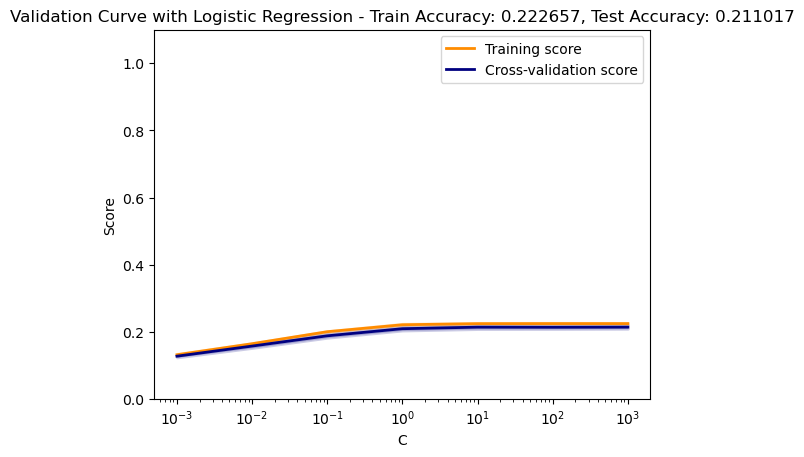

In [38]:
model_trainer.train_logistic_regression(X_train, y_train, X_test, y_test)

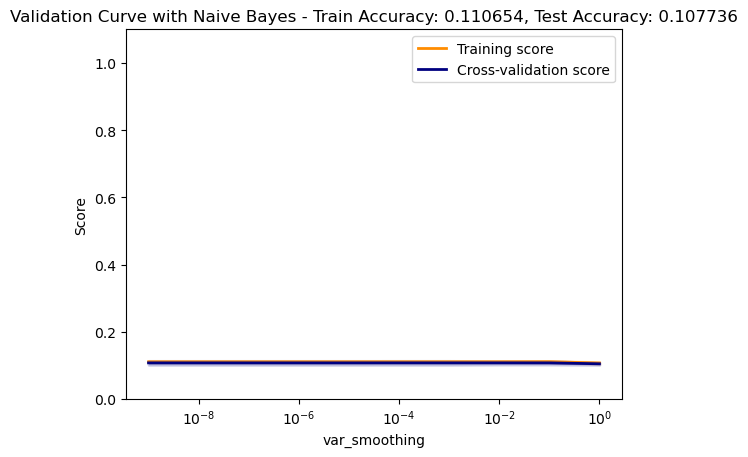

In [39]:
model_trainer.train_naive_bayes(X_train, y_train, X_test, y_test)

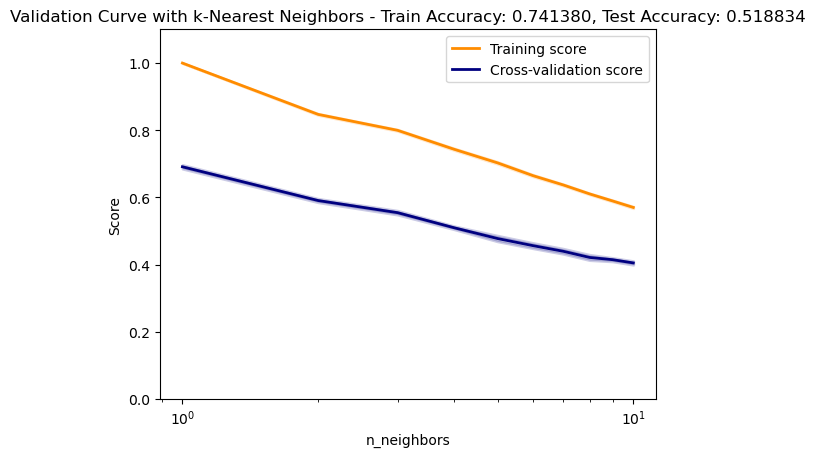

In [40]:
model_trainer.train_knn(X_train, y_train, X_test, y_test)

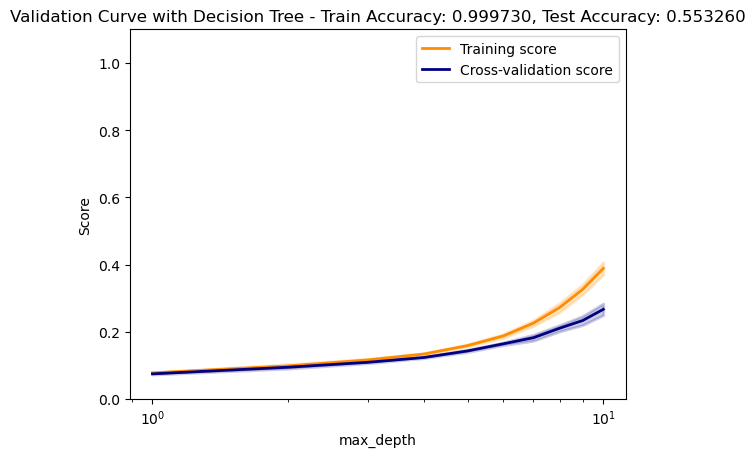

In [41]:
model_trainer.train_decision_tree(X_train, y_train, X_test, y_test)

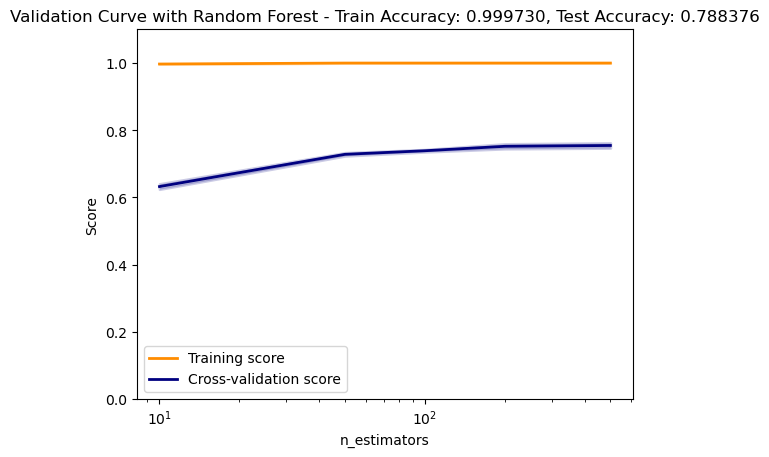

In [42]:
model_trainer.train_random_forest(X_train, y_train, X_test, y_test)

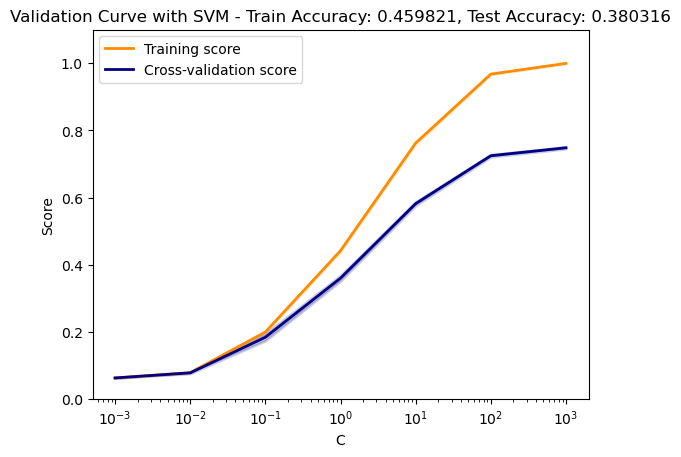

In [43]:
model_trainer.train_svm(X_train, y_train, X_test, y_test)

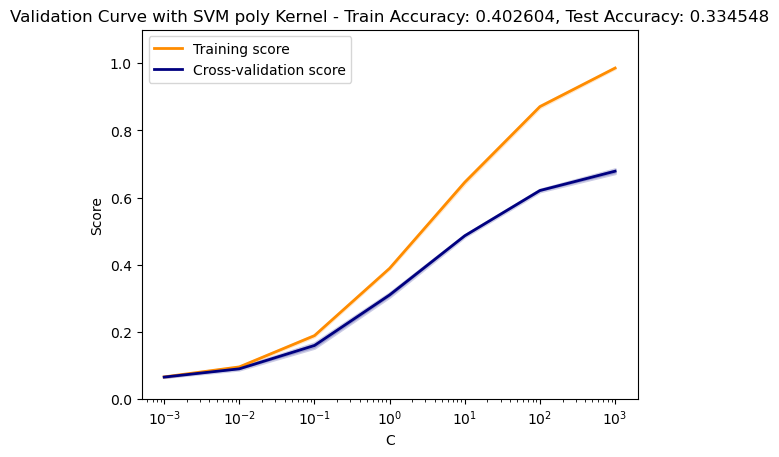

In [44]:
model_trainer.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='poly')

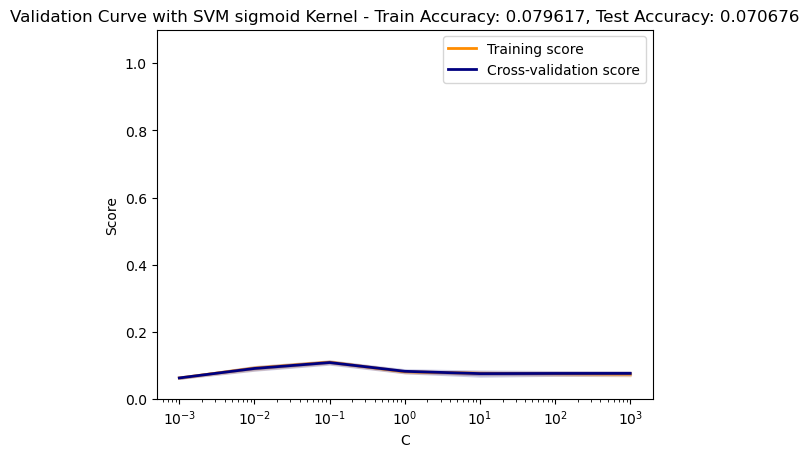

In [45]:
model_trainer.train_svm_kernel(X_train, y_train, X_test, y_test, kernel='sigmoid')

In [11]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 14.6 MB/s eta 0:00:00m eta 0:00:010:00:01


Train Accuracy: 0.9996626408474462
Test Accuracy: 0.7266099635479951


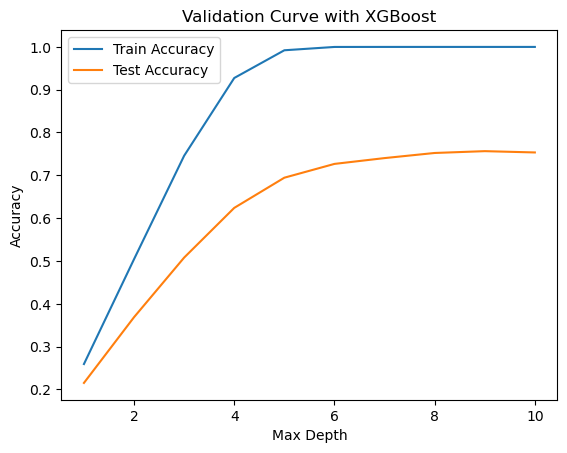

In [12]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=21)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the validation curve (e.g., with max_depth)
param_range = range(1, 11)
train_scores, test_scores = [], []
for depth in param_range:
    model = xgb.XGBClassifier(objective='multi:softmax', num_class=21, max_depth=depth)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure()
plt.plot(param_range, train_scores, label='Train Accuracy')
plt.plot(param_range, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve with XGBoost')
plt.legend()
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty (L1 or L2)
    'solver': ['liblinear', 'saga'],      # Solver algorithm
    'max_iter': [1000, 1500, 2000]          # Maximum number of iterations
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.2240739491262398
Test Accuracy: 0.2130417172944512


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the KNN model
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Train Accuracy: 0.999730112677957
Test Accuracy: 0.7073714054272985


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the Decision Tree model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],     # Criterion for splitting
    'max_depth': [None, 5, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': [ 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.9996626408474462
Test Accuracy: 0.5534629404617254


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
random_forest_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],      # Number of trees in the forest
    'criterion': ['gini', 'entropy'],     # Criterion for splitting
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Accuracy: 0.999730112677957
Test Accuracy: 0.799918995544755


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM model
svm_classifier = SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf','sigmoid','poly'],     # Kernel type: linear or radial basis function (RBF)
    'gamma': ['scale', 'auto']       # Kernel coefficient for 'rbf' kernel
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Train Accuracy: 0.9664665002361514
Test Accuracy: 0.767314702308627


# Ensemble KNN, Random Forest, SVM and XGboost

In [51]:
from sklearn.ensemble import VotingClassifier

# Initialize each trained model
knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance')
rf_model = RandomForestClassifier(criterion='gini', max_depth=30, max_features='sqrt', 
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=500)
svm_model = SVC(C=100, gamma='scale', kernel='rbf')
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=21)

# Create a voting classifier with the trained models
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('rf', rf_model),
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting='hard')  # Use 'hard' voting for majority rule voting

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the training and test sets using the ensemble
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Calculate the ensemble's train and test accuracies
ensemble_train_accuracy = accuracy_score(y_train, y_train_pred)
ensemble_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Ensemble Train Accuracy:", ensemble_train_accuracy)
print("Ensemble Test Accuracy:", ensemble_test_accuracy)


Ensemble Train Accuracy: 0.999730112677957
Ensemble Test Accuracy: 0.7970838396111786


In [40]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [52]:
from joblib import dump

# Specify the filename for saving the model
model_filename = 'ensemble_model.joblib'

# Save the ensemble model to disk
dump(voting_clf, model_filename)

['ensemble_model.joblib']

In [2]:
# import pickle

# # Specify the filename for saving the model
# model_filename = 'ensemble_model.pkl'

# # Save the ensemble model to disk
# with open(model_filename, 'wb') as file:
#     pickle.dump(voting_clf, file)


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import librosa
# import os
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import io
from scipy.io import wavfile

def extract_features(audio_data, sr): 
    features = {}
    # Existing Librosa Features
    features["chroma_stft"] = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    features["chroma_cqt"] = librosa.feature.chroma_cqt(y=audio_data, sr=sr)
    features["chroma_cens"] = librosa.feature.chroma_cens(y=audio_data, sr=sr)
    features["melspectrogram"] = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    features["mfccs"] = librosa.feature.mfcc(y=audio_data, sr=sr)
    features["rms"] = librosa.feature.rms(y=audio_data)
    features["spectral_centroid"] = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    features["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    features["spectral_contrast"] = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    features["spectral_flatness"] = librosa.feature.spectral_flatness(y=audio_data)
    features["spectral_rolloff"] = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    features["poly_features"] = librosa.feature.poly_features(y=audio_data, sr=sr)
    features["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=audio_data)
    # Additional Librosa Features
    features["harmonic_centroid"] = librosa.feature.spectral_centroid(y=librosa.effects.harmonic(audio_data), sr=sr)
    features["harmonic_tonnetz"] = librosa.effects.harmonic(librosa.feature.tonnetz(y=audio_data, sr=sr))
    features["harmonic_rms"] = librosa.feature.rms(y=librosa.effects.harmonic(audio_data))
    features["harmonic_spectral_flatness"] = librosa.feature.spectral_flatness(y=librosa.effects.harmonic(audio_data))
    features["harmonic_spectral_contrast"] = librosa.feature.spectral_contrast(y=librosa.effects.harmonic(audio_data), sr=sr)
    features["harmonic_spectral_rolloff"] = librosa.feature.spectral_rolloff(y=librosa.effects.harmonic(audio_data), sr=sr)
    features["harmonic_zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=librosa.effects.harmonic(audio_data))
        
    return features

def calculate_mean(features):
    
    mean=[]
    for feature_name, feature_values in features.items():
        # Calculate mean
        feature_mean = np.mean(feature_values, axis=1)
        Final_feature_mean=np.mean(feature_mean, axis=0)
        mean.append(Final_feature_mean)
    return mean

def compute_features():
       # Convert audio data to WAV format
    #    wav_buffer = io.BytesIO()
    #    wavfile.write(wav_buffer, rate=16000, data=audio_data)
    #    wav_buffer.seek(0)

    # Load the audio data from the WAV buffer
    audio_data, sr = librosa.load('Track 1.wav')
    features = extract_features(audio_data, sr)
    mean= calculate_mean(features)
    #this will pass to pre processing function
    return mean



print("Features : ",compute_features())

class Data_Preprocessing:
    def __init__(self, X):
        self.dataset = pd.read_csv("data.csv")
        self.X=X

    def get_X(self):
        return np.array(self.X)
    
    def scaling_data(self, X):
        
        XX=self.dataset.iloc[:,:-1].values
        y=self.dataset.iloc[:,-1].values
        x_train,x_test,y_train,y_test=train_test_split(XX,y,test_size=0.25,stratify=y,random_state=42)
        ss = StandardScaler()
        self.x_train=ss.fit_transform(x_train)
        self.x_test=ss.transform(x_test)
        X_scaled = ss.transform([X])
        
        return  X_scaled

    def preprocessing(self):
        X = self.get_X()
        features = self.scaling_data(X)
#         print("Scaled features : ",features)
        return features
        


data_processor = Data_Preprocessing(compute_features())
x=data_processor.preprocessing()
x

C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=889
  warnings.warn(
C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=112
  warnings.warn(


Features :  [0.4185079, 0.39693323, 0.23954631, 0.19433042, -22.467918, 0.018554302, 1889.0375295628332, 1912.963124232756, 21.942481504783977, 0.050268173, 3457.3287963867188, 0.11361375708604168, 0.1258544921875, 1074.5880188974315, -0.008783509793212711, 0.009568752, 0.043696243, 23.858915701070714, 2059.4009399414062, 0.044010707310267856]


array([[ 0.99624808, -0.3608495 , -0.29256454, -0.64322942, -1.10263869,
        -0.94237069,  0.44683611,  0.192198  ,  1.78486097,  1.60733954,
         0.20704887, -1.10810009,  1.41142268, -0.37534779, -1.09138156,
        -0.97211611,  2.92603141,  1.39366574, -0.30171533, -0.31722271]])

In [11]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 145.2 kB/s eta 0:11:27
   ---------------------------------------- 0.0/99.8 MB 140.3 kB/s eta 0:11:51
   ---------------------------------------- 0.1/99.8 MB 204.8 kB/s eta 0:08:07
   ---------------------------------------- 0.1/99.8 MB 196.9 kB/s eta 0:08:27
   ---------------------------------------- 0.1/99.8 MB 313.8 kB/s eta 0:05:18
   ---------------------------------------- 0.2/99

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\anasa\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\anasa\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\anasa\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\anasa\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anasa\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\anasa\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^

   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ --------- 76.3/99.8 MB 290.8 kB/s eta 0:01:21
   ------------------------------ ------

In [12]:
from joblib import load

# Load the saved ensemble model from disk
loaded_model = load('ensemble_model.joblib')

# Now you can use loaded_model to make predictions
predictions = loaded_model.predict(x)

ModuleNotFoundError: No module named 'xgboost'